#### Import OHLC Data Between January 1, 2020 and February 26, 2024.

In [1]:
import yfinance as yf  # Fetches financial data from Yahoo Finance
import pandas as pd 
import numpy as np    

In [2]:
# The following tickers point to:
# BAC: Bank of America Corporation
# C: Citigroup Inc.
# GS: The Goldman Sachs Group, Inc.
# JPM: JPMorgan Chase & Co.
# WFC: Wells Fargo & Co.

df = yf.download(['WFC', 'JPM', 'BAC', 'C', 'GS'], start='2020-01-01', end='2024-02-26')['Adj Close']

df

[*********************100%%**********************]  5 of 5 completed


Ticker,BAC,C,GS,JPM,WFC
Date,,,,,
2020-01-02,32.048054,68.963692,210.857285,124.254204,47.959927
2020-01-03,31.382650,67.664711,208.391647,122.614464,47.665474
2020-01-06,31.337673,67.452469,210.524338,122.516998,47.379951
2020-01-07,31.130859,66.866684,211.910172,120.434128,46.987343
2020-01-08,31.445580,67.376068,213.952896,121.373619,47.130104
...,...,...,...,...,...
2024-02-16,33.851540,54.849998,381.734833,179.029999,51.910000
2024-02-20,33.722446,55.419998,381.814240,179.729996,51.770000
2024-02-21,33.464268,55.330002,385.537842,180.899994,52.660000


## 1) Exploratory Data Analysis

#### Plot historical data to gain insight on stock performance.

<Axes: xlabel='Date'>

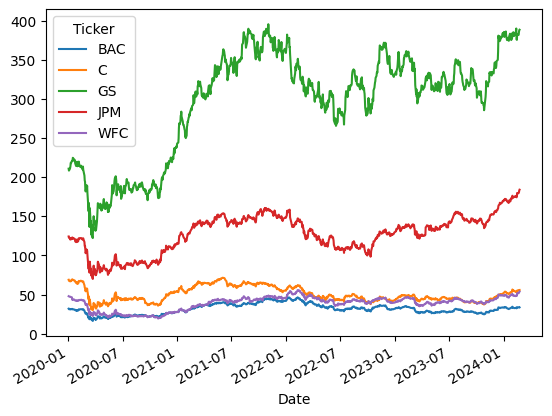

In [3]:
df.plot()

#### It is clear that Goldman Sachs had the highest adjusted close prices between January 2020 and February 2024. They outperformed the other four stocks. In second place is JPMorgan.
#### Adjusted close prices of Citigroup, Wells Fargo and Bank of America are more closely aligned with each other and are among the lowest.
#### The highest fluctuation in close prices occurs with Goldman Sachs, which allows us to predict there is more risk associated with investing in them.

#### Let's look at the mean and standard deviation for each stock.

In [4]:
df.mean()

Ticker
BAC     31.614608
C       50.419084
GS     295.872481
JPM    127.583312
WFC     38.862369
dtype: float64

#### This confirms what we see in our plot- GS consistently had higher stock prices throughout this time period.
#### The stock with the lowest close prices on average is Bank of America.

In [5]:
df.std()

Ticker
BAC     6.501090
C       9.360409
GS     67.847643
JPM    24.069129
WFC     8.562331
dtype: float64

#### GS having a high standard deviation confirms our suspicion that there would be higher risk when investing in them compared to the other stocks.
#### BAC has little fluctuation in plot, and therefore, a lower risk level for investing.

#### Now, let's calculate returns and cumulative returns.

In [6]:
# Return

return_df = df.pct_change()

# Remove first row containing NaNs- cannot calculate return for 2020-01-02 if we do not have data from 2020-01-01.

return_df.dropna(inplace=True)

return_df

Ticker,BAC,C,GS,JPM,WFC
Date,,,,,
2020-01-03,-0.020763,-0.018836,-0.011693,-0.013197,-0.006140
2020-01-06,-0.001433,-0.003137,0.010234,-0.000795,-0.005990
2020-01-07,-0.006600,-0.008684,0.006583,-0.017001,-0.008286
2020-01-08,0.010110,0.007618,0.009640,0.007801,0.003038
2020-01-09,0.001716,0.009072,0.020356,0.003651,-0.001704
...,...,...,...,...,...
2024-02-16,0.000587,-0.006521,-0.002543,-0.004670,-0.002498
2024-02-20,-0.003814,0.010392,0.000208,0.003910,-0.002697
2024-02-21,-0.007656,-0.001624,0.009752,0.006510,0.017191


In [7]:
# Cumulative return

cumul_return_df = (((return_df + 1).cumprod() - 1) * 100)

cumul_return_df

Ticker,BAC,C,GS,JPM,WFC
Date,,,,,
2020-01-03,-2.076268,-1.883572,-1.169339,-1.319666,-0.613956
2020-01-06,-2.216611,-2.191331,-0.157901,-1.398106,-1.209291
2020-01-07,-2.861935,-3.040742,0.499336,-3.074404,-2.027909
2020-01-08,-1.879909,-2.302115,1.468107,-2.318300,-1.730241
2020-01-09,-1.711546,-1.415754,3.533635,-1.961631,-1.897680
...,...,...,...,...,...
2024-02-16,5.627443,-20.465397,81.039433,44.083655,8.236195
2024-02-20,5.224631,-19.638875,81.077092,44.647014,7.944286
2024-02-21,4.419033,-19.769374,82.843027,45.588631,9.800001


#### GS had the most cumulative return between January 2020 and February 2024 at around 84% total.
#### C took an 18% loss between January 2020 and February 2024.

#### Let's calculate and visualize monthly cumulative returns. Here, we simply take the last cumulative return value of each month. The dashed y=0 line shows the boundary between positive return and negative return (or loss).

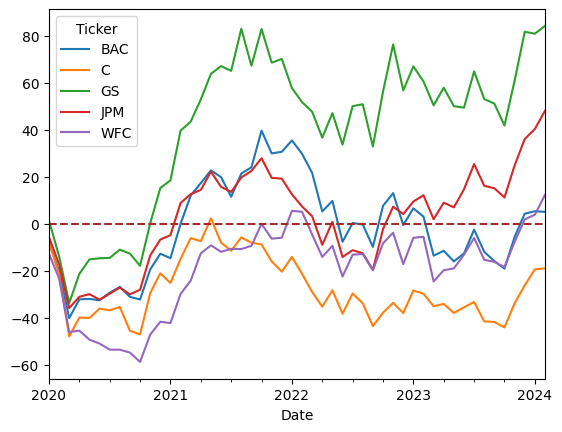

In [8]:
cumul_return_df.resample('M').agg('last').plot().axhline(y=0, color='brown', linestyle='--')

#### We see a sharp decline in performance of all stocks during the start of 2020. This can be tied to the COVID-19 pandemic which began impacting major institutions around this time.
#### WFC is the only institution to have suffered in performance for a while longer after the start of the pandemic; there was a longer recovery time.
#### C is almost completely submerged in negative space; C not only has a negative cumulative return between 2020 and 2024, but it has taken a loss at the end of every month within this time frame. The case is about the same for WFC.

#### Let's look at the directional relationship between the variables using covariance. We will also be using this to calculate portfolio risk.

In [9]:
return_df.cov()

Ticker,BAC,C,GS,JPM,WFC
Ticker,,,,,
BAC,0.000568,0.000547,0.000431,0.000463,0.000535
C,0.000547,0.000676,0.000466,0.000480,0.000550
GS,0.000431,0.000466,0.000466,0.000384,0.000435
JPM,0.000463,0.000480,0.000384,0.000456,0.000458
WFC,0.000535,0.000550,0.000435,0.000458,0.000664


#### This tells us that there is positive covariance between institutions; they all tend to move in the same direction (up or down) together, but at different strengths.

## 2) Building the Optimal Portfolio

#### To build the optimal portfolio containing these stocks, we will first create an equally-weighted portfolio and calculate its Sharpe Ratio to determine how it will perform. Then, we will use the Efficient Frontier method by generating a high number of arrays containing randomly-generated, unequal weights, find their associated expected returns, risk levels and Sharpe Ratios, and finally find the maximum Sharpe Ratio to locate the optimal portfolio.

#### Create an array of equal weights.

In [10]:
weights = np.ones(len(return_df.columns))/len(return_df.columns)

weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

#### The sum of weights should always equal 1.

In [11]:
weights.sum()

1.0

#### Next, create a function that uses the weights vector to calculate expected return, risk and the Sharpe Ratio.

In [12]:

equal_weight_exp_return = []
equal_weight_risk = []

def equal_weight_portfolio():
    equal_weight_exp_return = 'Expected Return: ', np.dot(return_df.mean(), weights)
    equal_weight_risk = 'Risk: ', (np.dot(np.dot(weights, return_df.cov()), weights))**(1/2)
    sharpe_ratio = 'Sharpe Ratio: ', (np.dot(return_df.mean(), weights)) / (np.dot(np.dot(weights, return_df.cov()), weights))**(1/2)
    return equal_weight_exp_return, equal_weight_risk, sharpe_ratio

In [13]:
equal_weight_portfolio()

(('Expected Return: ', 0.0004668248254952448),
 ('Risk: ', 0.02220480120401665),
 ('Sharpe Ratio: ', 0.0210235985094431))

#### This is our equally-weighted portfolio. This suggests that, if we buy the same number of stocks from each institution, we can expect around .05% return on our investment, at a 2.2% level of risk.

#### Overall, this seems like a pretty low return for this level of risk.

#### As a guide- Sharpe Ratios that equal 1 or higher are ideal. A Sharpe Ratio of .021 is pretty low. We can do better using the Efficient Frontier method.

#### Create a function to generate weights.

In [14]:
rand_weights = []

def get_weights():
    rand_weights = np.random.random(len(df.columns)) 
    rand_weights /= rand_weights.sum()  # This normalizes the array; it makes sum of all weights equal to 1. 
    return rand_weights

#### Call the function to test it. The results are our weights assigned to each institution from left to right.

In [15]:
print(df.columns)
get_weights()

Index(['BAC', 'C', 'GS', 'JPM', 'WFC'], dtype='object', name='Ticker')


array([0.20382746, 0.23865041, 0.14459568, 0.10720378, 0.30572266])

#### The following loop will call this function 2,000 times and calculate expected return and risk associated with each set of weights called.

In [16]:
random_weights = []
pf_exp = []
pf_std = []

for i in range(2000):
    W = get_weights()      
    random_weights.append(W)
    pf_exp.append(np.dot(return_df.mean(), W)*252)   # There are about 252 days in a year that stocks are traded.
    pf_std.append(np.dot(np.dot(return_df.cov(), W), W)*252)

#### Concatenate columns into a new data frame.

In [17]:
pf_df = pd.DataFrame({'Return':pf_exp, 'Risk':pf_std, 'Weights':random_weights})

pf_df.head()

,Return,Risk,Weights
0,0.116263,0.126356,"[0.18718208524310928, 0.09245125246727498, 0.0..."
1,0.129307,0.122517,"[0.22579988156049433, 0.08014594444360139, 0.2..."
2,0.145073,0.116757,"[0.2200296329156841, 0.15262846424850007, 0.48..."
3,0.103241,0.141658,"[0.43880113685108435, 0.013555640488898277, 0...."
4,0.105927,0.126409,"[0.34772055371893557, 0.16892773465034283, 0.0..."


#### Each row in our new data frame corresponds to a single portfolio.

#### Create a scatter plot to view each portfolio with expected return on the Y-axis and risk on the X-axis.

<Axes: xlabel='Risk', ylabel='Return'>

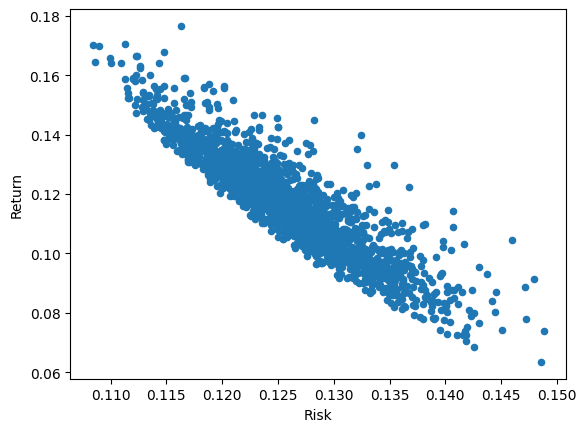

In [18]:
pf_df.plot(x='Risk', y='Return', kind='scatter')

#### Our optimal portfolio will have the lowest risk and highest expected return value pair (or a maximum Sharpe Ratio)

#### Create a new column containing Sharpe Ratios.

In [19]:
pf_df['Sharpe Ratio'] = pf_df['Return'] / pf_df['Risk']

pf_df.head(3)

,Return,Risk,Weights,Sharpe Ratio
0,0.116263,0.126356,"[0.18718208524310928, 0.09245125246727498, 0.0...",0.920117
1,0.129307,0.122517,"[0.22579988156049433, 0.08014594444360139, 0.2...",1.055418
2,0.145073,0.116757,"[0.2200296329156841, 0.15262846424850007, 0.48...",1.242522


#### To find the maximum Sharpe Ratio, find the index where we have the largest value.

In [20]:
pf_df['Sharpe Ratio'].nlargest(1).index

Index([1182], dtype='int64')

#### Now, let's print the row located at this index.

In [21]:
max_sharpe = pf_df.loc[pf_df['Sharpe Ratio'].nlargest(1).index]

pd.set_option('display.max_colwidth', None)   # Print full array of weights in Weights column

max_sharpe

,Return,Risk,Weights,Sharpe Ratio
1182,0.170151,0.108398,"[0.01410129556006248, 0.00023111519472235255, 0.4250694385173442, 0.46091957566141467, 0.09967857506645629]",1.569689


In [22]:
df.columns

Index(['BAC', 'C', 'GS', 'JPM', 'WFC'], dtype='object', name='Ticker')

#### Finding this coordinate in our plot should confirm that we've identified the best portfolio possible given these weights. A Sharpe Ratio of above 1 is ideal.

#### Comparing this Sharpe Ratio with that of the equally-weighted portfolio...

In [23]:
equal_weight_portfolio()

(('Expected Return: ', 0.0004668248254952448),
 ('Risk: ', 0.02220480120401665),
 ('Sharpe Ratio: ', 0.0210235985094431))

#### We can confirm that our optimal portfolio is the one derived using the Efficient Frontier method (1.6 > 0.02). This means that we should not invest in the same number of stocks from each institution. Rather, we should invest:

In [28]:
for i in range(len(df.columns)):
    print((max_sharpe['Weights'].iloc[0][i]*100).round(2), '% of our stocks in', df.columns[i])

1.41 % of our stocks in BAC
0.02 % of our stocks in C
42.51 % of our stocks in GS
46.09 % of our stocks in JPM
9.97 % of our stocks in WFC
